# Perkenalan

Kelompok 5 :
- Adjie Perdana Kusuma (PYTN-KS12-010)
- Yunita Yulianda (PYTN-KS12-001)
- Naufal Reza Pahlevi (PYTN-KS12-021)

#### Latar Belakang Dataset
Penyakit kardiovaskular (CVD) merupakan penyebab kematian nomor 1 di seluruh dunia, dengan perkiraan 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari seluruh kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD, dan dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan tidak sehat dan obesitas, kurang aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi berbasis populasi.

Orang yang menderita penyakit kardiovaskular atau berisiko tinggi terkena penyakit kardiovaskular (karena memiliki satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dini dan pengelolaan di mana model pembelajaran mesin dapat sangat membantu.

#### Data
Dataset ini diambil dari website Kaggle https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data. Dataset ini memiliki 13 atribut/variabel yang didalamnya terdapat satu variabel kelas yaitu DEATH_EVENT yang akan diprediksi. Variabel-variabelnya antara lain :
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
    * 0 = Tidak
    * 1 = Ya
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
    * 0 = Tidak
    * 1 = Ya
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasidi setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
    * 0 = Tidak
    * 1 = Ya
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
    * 0 = Perempuan
    * 1 = Laki-laki
11. smoking - apakah pasien merokok
    * 0 = Tidak
    * 1 = Ya
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up (Variabel Target)
    * 0 = Tidak
    * 1 = Ya


#### Capaian
Dengan menggunakan model prediksi yang dibangun dari dataset ini, dapat diidentifikasi pasien-pasien yang berisiko tinggi mengalami kematian akibat gagal jantung. Hal ini memungkinkan tenaga medis untuk melakukan intervensi yang lebih dini dan agresif pada pasien-pasien tersebut, seperti pengelolaan yang lebih intensif atau pengawasan yang lebih ketat.
Dapat melakukan prediksi dengan baik dan menentukan variabel apa saja yang berpengaruh besar terhadap Gagal Jantung.

# Import Library

In [1]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

# building model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

Dilakukan import library untuk beberapa tahapan yang dilakukan selama proses pengerjaan project

# Data Loading

Menggunakan pustaka pandas yang diimpor sebagai pd untuk membaca file CSV

In [2]:
df = pd.read_csv("Dataset/heart_failure_clinical_records_dataset.csv")

Melihat 5 data teratas dari dataset dengan fungsi .head()

In [3]:
#Menampilkan 5 Data Teratas

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Melihat 5 data terbawah dari dataset dengan fungsi .tail()

In [4]:
#Menampilkan 5 data terbawah

df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
# Melihat semua feature dalam dataset

print(df.columns.values)

['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']


Berdasarkan output diatas dapat dilihat bahwa dataset ini memiliki 13 variabel/kolom

In [6]:
#Menampilkan informasi data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Berdasarkan output diatas dapat diketahui type data float64 dimiliki oleh variabel age, platelets, dan serum_creatinine. Sedangkan yang lainnya bertype data int64. Selain itu, pada output diatas juga dapat dilihat penggunaan memory dari dataset ini sebesar 30.5 KB.

In [7]:
#Menampilkan dimensi data

df.shape

(299, 13)

Code diatas menampilkan dimensi data dengan fungsi .shape. Berdasarkan output, dapat diketahui bahwa dataset ini memiliki 299 baris dan 13 kolom 

In [8]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Code diatas menampilkan distribusi pada kolom DEATH_EVENT dengan fungsi value_counts(). Dapat dilihat bahwa kolom kelas/target DEATH_EVENT memiliki persebaran data yang tidak balanced karena memiliki perbedaan yang cukup jauh.
* 0 = tidak (203 baris)
* 1 = Ya (96 baris)

# Data Cleaning

In [9]:
#Menampilkan jumlah nilai null dalam data

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Berdasarkan output diatas dapat dilihat bahwa dataset ini tidak memiliki missing value yang artinya dataset ini bersih dari kekosongan nilai setiap barisnya. 

In [10]:
#Menampilkan jumlah duplikat pada data

df.duplicated().sum()

0

Berdasarkan output diatas dapat dipastikan bahwa dataset ini tidak memiliki data yang duplikat.

In [11]:
# Rename nama kolom

df.rename(columns={'anaemia':'anemia', 'creatinine_phosphokinase':'CPK', 'high_blood_pressure':'high_blood', 'serum_creatinine':'creatinine','serum_sodium':'sodium','DEATH_EVENT':'DEATH'}, inplace=True)

Dilakukan pengubahan nama kolom dengan fungsi .rename guna mempermudah pemahaman terhadap kolom-kolom data. 
* anaemia di-rename dengan anemia
* creatinine_phosphokinase di-rename dengan CPK
* high_blood_pressure di-rename dengan higb blood
* serum_creatinine di-rename dengan creatinine
* serum_sodium di-rename dengan sodium
* DEATH_EVENT di-rename dengan DEATH

Ditampilkan kembali 5 data teratas untuk melihat perubahan

In [12]:
df.head()

,age,anemia,CPK,diabetes,ejection_fraction,high_blood,platelets,creatinine,sodium,sex,smoking,time,DEATH
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Explorasi Data

In [13]:
# Mengumpulkan kolom kategorikal untuk divisualisasi

categorical = ["anemia", "diabetes", "high_blood", "sex", "smoking"] 

Kolom anemia, diabetes, high_blood, sex dan smoking merupakan kolom kategorikal dengan kategori 0 dan 1

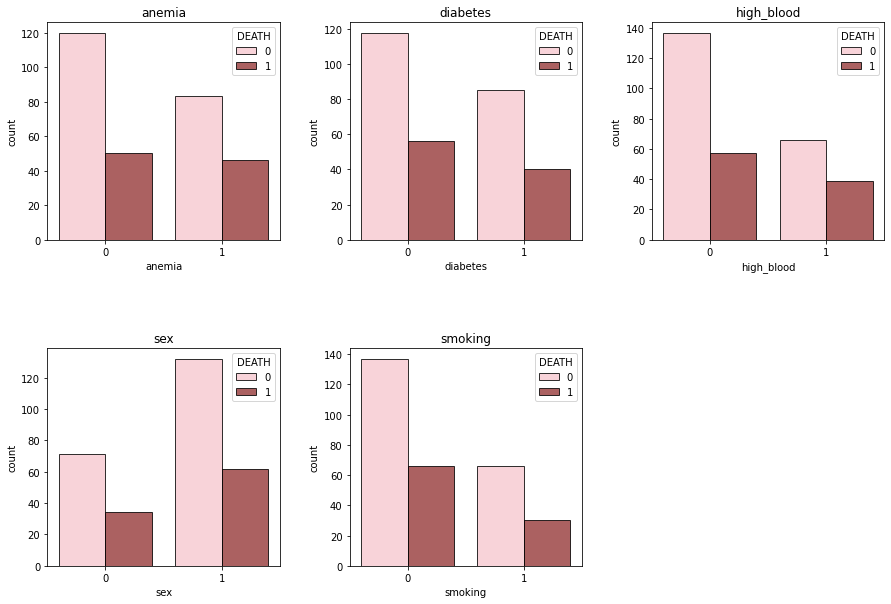

In [14]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=df, x=col, hue="DEATH", palette = ["pink", "brown"], alpha=0.8, edgecolor="k", linewidth=1)

Visualisasi diatas digunakan untuk melihat peresebaran data dalam kolom kategorikal. Dapat dilihat bahwa semua kolom kategorikal memiliki persebaran data yang tidak seimbang (memiliki selisih yang jauh) berdasarkan kematian (kolom DEATH). 

In [15]:
# Mengumpulkan kolom numerical ke dalam atribut 'numerical'

numerical= ['age', 'CPK', 'platelets', 'ejection_fraction', 'creatinine', 'sodium', 'time'] #numerical_features

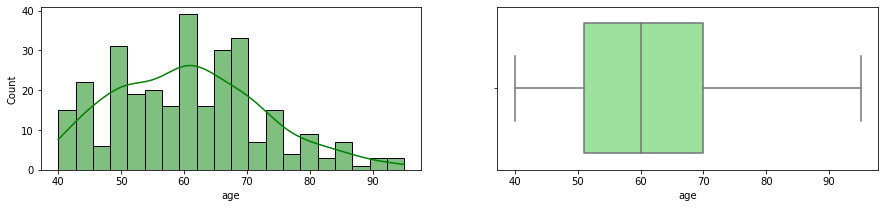

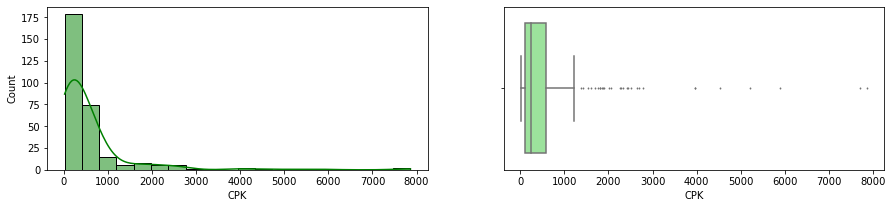

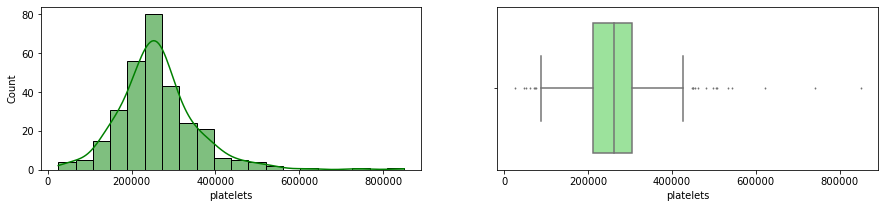

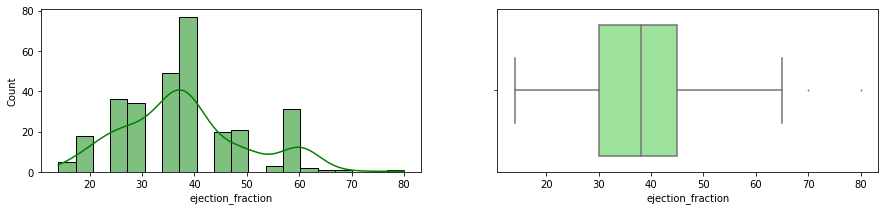

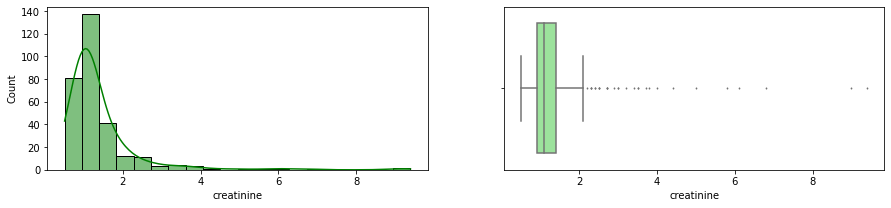

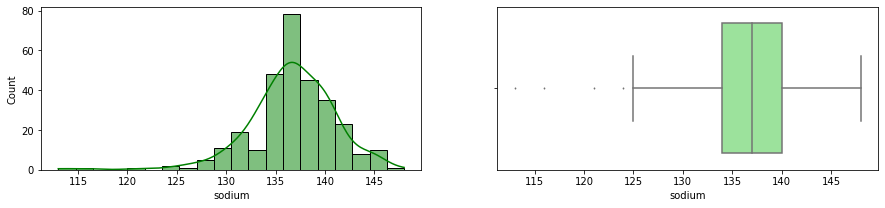

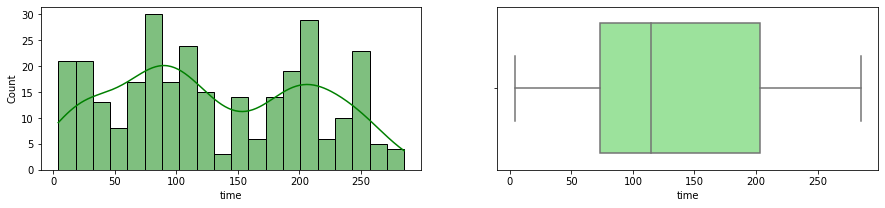

In [16]:
for i in numerical:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, color='green', kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='lightgreen', fliersize=1);

Visualisasi diatas mempresentasikan tentang persebaran data dan boxplot untuk kolom numerical yaitu 'age', 'CPK', 'platelets', 'ejection_fraction', 'creatinine', 'sodium', dan 'time'. Dapat dilihat bahwa ada beberapa kolom yang berdistribusi skew negatif dan positif seperti CPK, creatinine, dan Sodium. Distribusi yang tersebar secara tak normal tersebut dapat saja dipengaruhi oleh adanya outlier dalam kolom seperti yang dapat dilihat pada boxplot, data yang memiliki outlier yaitu sodium, creatinine, ejection_fraction, platelets dan CPK. 

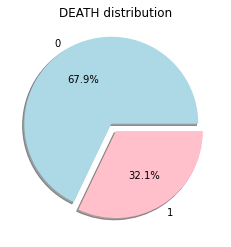

In [17]:
# distribution of target variable

plt.pie(df['DEATH'].value_counts(), colors=['lightblue','pink'], autopct='%1.1f%%', shadow=True, explode=[0.1,0.0], labels=[0,1])
plt.title( 'DEATH distribution')
plt.show()

Visualisasi diatas digunakan untuk melihat perbedaan frekuensi kategori 0 dan 1 pada kolom target yaitu kolom DEATH. Dapat dilihat bahwa adanya perbedaan frekuensi yang cukup signifikan. Kategori 0 sebesar 67.9%, sedangkan kategori 1 sebesar 32.1%. Artinya, orang yang tidak meninggal lebih besar frekuensinya dari yang meninggal.

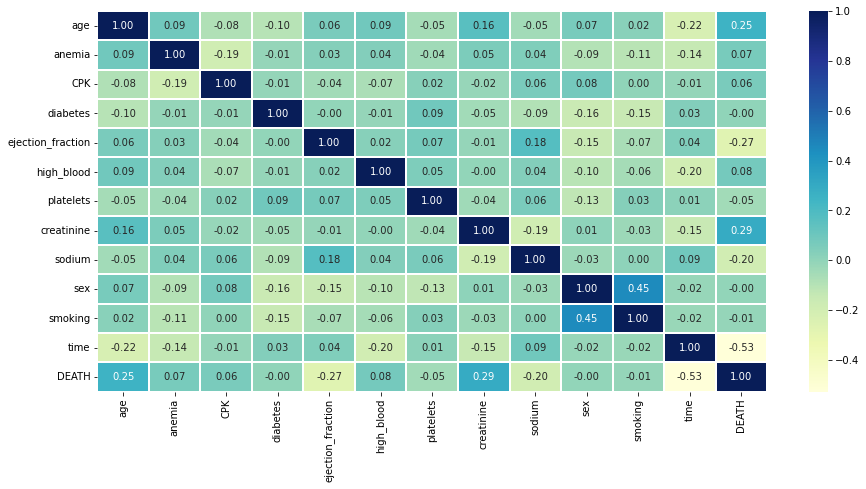

In [18]:
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidth=0.3, cmap='YlGnBu', ax=ax)
plt.show()

Visualisasi headmap diatas mempresentasikan tentang korelasi antar kolom pada dataset yang digunakan.

# Data Preprocessing

In [19]:
data = df.copy()

Kode di atas adalah perintah untuk membuat salinan (copy) dari DataFrame df dan menyimpannya dalam variabel data.

### Feature Selection

In [20]:
# Menampilkan korelasi antar kolom

data.corr()

,age,anemia,CPK,diabetes,ejection_fraction,high_blood,platelets,creatinine,sodium,sex,smoking,time,DEATH
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
CPK,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [21]:
# Menampilkan korelasi antar fitur dengan kolom DEATH  sebagai kolom target

corr_matrix = data.corr()
corr_matrix.DEATH.sort_values(ascending= False)

DEATH                1.000000
creatinine           0.294278
age                  0.253729
high_blood           0.079351
anemia               0.066270
CPK                  0.062728
diabetes            -0.001943
sex                 -0.004316
smoking             -0.012623
platelets           -0.049139
sodium              -0.195204
ejection_fraction   -0.268603
time                -0.526964
Name: DEATH, dtype: float64

Berdasarkan nilai korelasi antar kolom dapat dipilih beberapa kolom yang dapat digunakan untuk membangun model. 

Kolom-kolom yang digunakan untuk membangun model diantaranya :

1. Kolom `time` memiliki korelasi yang tinggi dengan kolom target yaitu `death` sebesar -0.53. Hal ini berarti semakin sering dilakukan follow-up kondisi pasien maka resiko kematian akibat penyakit jantung semakin kecil.
2. Kolom `ejection_fraction` memiliki koefisien korelasi negatif sebesar -0.27. Hal ini berarti semakin rendah presentase darah yang keluar dari jantung maka semakin tinggi resiko kematian akibat penyakit jantung.
3. Kolom `sodium` memiliki koefisien korelasi negatif sebesar -0.2. Hal ini berarti semakin rendah level serum sodium maka resiko kematian akibat penyakit jantung juga semakin tinggi.
4. Kolom `creatinine` memiliki korelasi positif sebesar 0.29. Hal ini berarti semakin tinggi evel serum creatinne dalam tubuh pasien, maka resiko kematian akibat penyakit jantung juga semakin tinggi.
5. Kolom `age` memiliki korelasi positif sebesar 0.25. Hal ini berarti semakin tua usia pasien, maka reskio kematian akibat penyakit jantung semakin tinggi.
6. Kolom `anemia`, `diabetes`, `high_blood`, `sex`, `smoking` merupakan kolom dengan korelasi yang rendah. Namun, pada beberapa penelitian anemia, diabetes, hipertensi, gender, dan perilaku merokok berpengaruh terhadap resiko kematian akibat penyakit jantung.

Kolom yang tidak digunakan :
1. Kolom `CPK` yang merupakan level enzim CPK dalam mcg/L, kolom ini berperan dalam pemantauan dan indikator adanya kerusakan/penyakit jantung dan otot. Namun, peningkatan ini tidak secara langsung menyebabkan heart_failure (tidak terlalu dibutuhkan)
2. Kolom `platelets` yang merupakan jumlah platelet di darah dalam kiloplatelets/mL, berperan dalam proses pembekuan darah. Sehingga, tidak secara langsung menyebabkan gagal jantung (tidak terlalu dibutuhkan)

Maka dapat diambil kesimpulan bahwa feature selection tidak sepenuhnya dilakukan dengan melihat korelasi antar kolom, namun juga melihat kondisi nyata terkait seberapa berpengaruhnya atribut tersebut dalam memprediksi kolom target.

In [22]:
# Dilakukan penghapusann kolom yang tidak digunakan

data.drop(['CPK','platelets'], axis=1, inplace=True)

In [23]:
# Ditampilkan 2 data teratas untuk melihat perubahan

data.head(2)

,age,anemia,diabetes,ejection_fraction,high_blood,creatinine,sodium,sex,smoking,time,DEATH
0,75.0,0,0,20,1,1.9,130,1,0,4,1
1,55.0,0,0,38,0,1.1,136,1,0,6,1


### Handling Outliers

In [24]:
# Memnghapus outlier dalam kolom yang mengandung outlier

features_with_outliers = ['ejection_fraction','creatinine','sodium']

for feature in features_with_outliers:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data.loc[data[feature]<lower_limit,feature] = lower_limit
    data.loc[data[feature]>upper_limit,feature] = upper_limit

Kode di atas bertujuan untuk mengatasi outlier dalam beberapa fitur (kolom) tertentu dalam DataFrame data. Outlier adalah nilai ekstrem yang jauh dari nilai-nilai lain dalam distribusi data. Dimana, untuk kolom yang memiliki outlier dapat dilihat pada bagian visualisasi data. Kemudian didefinisikan sebuah list bernama features_with_outliers yang berisi nama-nama fitur yang memiliki outlier. Dalam kasus ini, fitur-fitur tersebut adalah 'ejection_fraction', 'creatinine', dan 'sodium'.

In [25]:
data.shape

(299, 11)

Karena tidak ada pengurangan data, maka penghapusan outlier tidak mengakibatkan kehilangan data.

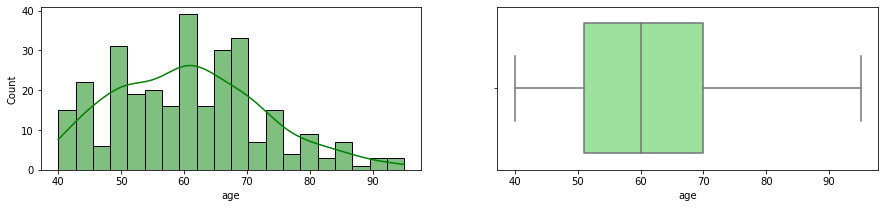

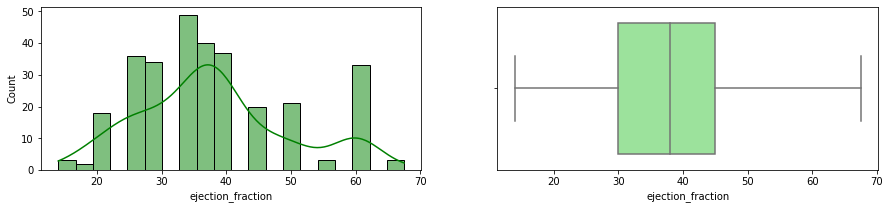

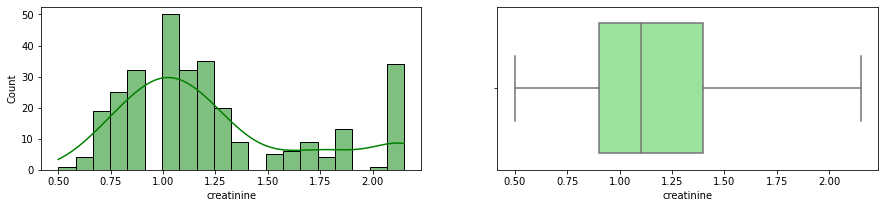

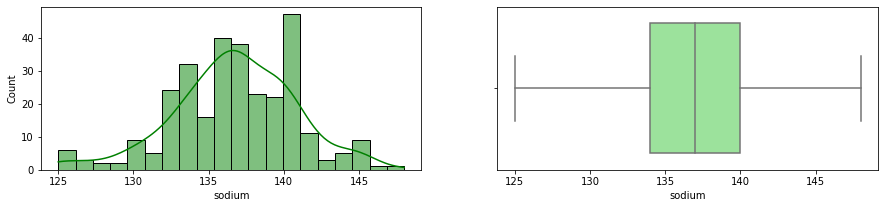

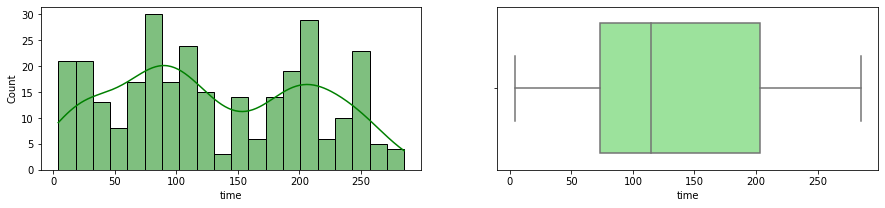

In [26]:
# Menampilkan histogram dan boxplot untuk melihat outlier dan distribusi data

num_col = ["age","ejection_fraction","creatinine","sodium", "time"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, color='green', kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='lightgreen', fliersize=1);

Dara visualisasi diatas dapat dilihat bahwa pada data tidak lagi ditemukan outlier, dan distribusi sudah normal. Maka dapat dipastikan bahwa data berdistribusi tidak normal sebelumnya disebabkan oleh banyaknya outlier dalam data.

### Splitting 

Splitting data digunakan untuk membagi dataset menjadi subset yang berbeda, seperti pelatihan (training) dan pengujian (testing). Ini adalah langkah penting dalam pengembangan dan evaluasi model machine learning.

In [27]:
X = data.drop(['DEATH'], axis = 1)
y = data['DEATH']

Untuk data heart_failure dilakukan splitting data X dan y, dimana X berisi fitur-fitur yang mempengaruhi kelas target yaitu y. 

In [28]:
# Menampilkan 5 data dari X

X[0:5]

,age,anemia,diabetes,ejection_fraction,high_blood,creatinine,sodium,sex,smoking,time
0,75.0,0,0,20.0,1,1.90,130,1,0,4
1,55.0,0,0,38.0,0,1.10,136,1,0,6
2,65.0,0,0,20.0,0,1.30,129,1,1,7
3,50.0,1,0,20.0,0,1.90,137,1,0,7
4,65.0,1,1,20.0,0,2.15,125,0,0,8


In [29]:
# Menampilkan 5 data dari y

y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: DEATH, dtype: int64

#### Scalling

In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Kode di atas bertujuan untuk melakukan penskalaan (scaling) data menggunakan StandardScaler pada suatu matriks fitur X (data fitur).

StandardScaler adalah sebuah objek yang digunakan untuk melakukan penskalaan fitur dengan menghilangkan rata-rata dan mengubah varians fitur menjadi 1. Ini adalah salah satu metode umum yang digunakan dalam preprocessing data untuk memastikan bahwa semua fitur memiliki skala yang serupa.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Code diatas akan membagi X dan y menjadi empat subset yang berbeda: 
- X_train (subset fitur untuk pelatihan)
- X_test (subset fitur untuk pengujian)
- y_train (subset target untuk pelatihan)
- y_test (subset target untuk pengujian)

Dimana data akan dibagi untuk training sebesar 60% dan 40% untuk testing dengan fungsi test_size=0.3

### Splitting balancing

Dapat dilihat pada bagian visualisasi data, banyak data yang imbalanced frekuensinya. Maka dari itu, kami juga melakukan percobaan membagi data dengan balancing frekuensinya. 

In [32]:
y_train.value_counts()

0    141
1     68
Name: DEATH, dtype: int64

Pada splitting sebelumnya dapat dilihat frekuensi untuk data label training memiliki frekuensi yang tidak seimbang (memiliki selisih yang jauh)

In [33]:
y_test.value_counts()

0    62
1    28
Name: DEATH, dtype: int64

Hal yang sama juga terjadi pada data label testing yang memiliki perbedaan frekuensi yang jauh

In [34]:
# dilakukan balancing dengan SMOTE

smote = SMOTE()
X_test_smo, y_test_smo = smote.fit_resample(X_test,y_test)

Balancing dilakukan dengan `SMOTE()` yang dapat meningkatkan jumlah sampel kelas minoritas. Namun, peningkatan sampel kelas minoritas yang dilakukan tetap mempertahankan informasi asli karena SMOTE melakukan interpolasi linier antara sampel kelas minoritas yang ada dan sampel-sampel tetangga untuk menciptakan sampel sintetis baru. Dengan melakukan ini, SMOTE berusaha mempertahankan informasi asli yang terkandung dalam kelas minoritas, menghindari pengubahan yang signifikan pada distribusi data.

In [35]:
X_train_smo, y_train_smo = smote.fit_resample(X_train.astype('float'), y_train)

Balancing dengan `SMOTE()` tidak hanya dilakukan pada data testing namun juga pada data training agar traning dan testing sama-sama memiliki data yang seimbang.

In [36]:
y_train_smo.value_counts()

0    141
1    141
Name: DEATH, dtype: int64

In [37]:
y_test_smo.value_counts()

0    62
1    62
Name: DEATH, dtype: int64

Dari kedua code diatas dapat dilihat bahwa data pada training dan testing sudah memiliki frekuensi yang seimbang. Dibuat nama yang berbeda dengan y_train dan y_test agar dapat dibedakan saat membangun model nantinya. 

In [38]:
print('Training dataset           :', len(X_train))
print('Training dataset balancing :', len(X_train_smo))
print('Testing dataset            :', len(X_test))
print('Testing dataset balancing  :', len(X_test_smo))

Training dataset           : 209
Training dataset balancing : 282
Testing dataset            : 90
Testing dataset balancing  : 124


Code diatas menampilkan jumlah data training dan testing pada splitting yang imbalanced dan balanced. Dapat dilihat bahwa jumlah training dan testing pada data yang balanced mengalami kenaikan karena `SMOTE()` menambah data sintesis baru kedalam data asli. 

# Pendefinisian Model

In [39]:
model_lr = LogisticRegression(solver ='liblinear',multi_class ='ovr',max_iter = 100)
model_svm = SVC(kernel='linear', C=100.0, probability=True)
model_dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
random_forest = RandomForestClassifier(random_state=42)

Model diatas didefinisikan sebagai estimators yang akan digunakan pada ensemble model. Estimator adalah model individu yang membentuk bagian dari ensemble. Estimator dapat menjadi model yang sama atau berbeda, tetapi mereka digunakan untuk mempelajari pola dan membuat prediksi terhadap data.

### Ensemble Voting

Ensemble voting adalah metode penggabungan prediksi dari beberapa model individu dalam sebuah ensemble model. Pendekatan ini didasarkan pada asumsi bahwa kombinasi prediksi dari beberapa model memiliki potensi untuk menghasilkan prediksi yang lebih akurat daripada model individu tersebut.

#### Hard Voting 

Dalam hard voting, setiap model memberikan satu suara atau prediksi untuk setiap contoh data. Prediksi akhir ensemble diambil berdasarkan mayoritas suara atau prediksi dari model-model dalam ensemble. Dalam konteks klasifikasi, prediksi dengan mayoritas suara dianggap sebagai prediksi kelas akhir.

In [40]:
# Pendefinisian Model
hard_voting = VotingClassifier(estimators = [('lr', model_lr), ('rf', random_forest), ('svm', model_svm), ('dtc', model_dtc)], voting='hard') 

Contohnya, jika terdapat ensemble model dengan 5 model individu, masing-masing model memberikan prediksi sebagai berikut untuk suatu contoh data:

- Model 1: Kelas A
- Model 2: Kelas A
- Model 3: Kelas B
- Model 4: Kelas A
- Model 5: Kelas B

Dalam hard voting, karena mayoritas suara memilih Kelas A (3 suara), maka prediksi akhir ensemble akan menjadi Kelas A.

#### Soft Voting 

Dalam soft voting, model-model dalam ensemble memberikan estimasi probabilitas untuk setiap kelas atau label. Prediksi ensemble dihasilkan dengan mengambil rata-rata probabilitas dari setiap model, dan kemudian memilih kelas dengan probabilitas tertinggi sebagai prediksi akhir.

In [41]:
# Pendefinisian Model
soft_voting = VotingClassifier(estimators = [('lr', model_lr), ('rf', random_forest), ('svm', model_svm), ('dtc', model_dtc)], voting ='soft') 


Untuk melakukan soft voting, kita akan mengambil rata-rata probabilitas untuk setiap kelas dari semua model.

### Ensemble Stacking

Ensemble stacking memanfaatkan kemampuan pembelajaran dari model-model individu dalam ensemble untuk menghasilkan prediksi yang lebih kuat melalui meta-learner.

In [42]:
stacking = StackingClassifier(estimators= [('lr', model_lr), ('rf', random_forest), ('svm', model_svm), ('dtc', model_dtc)])

Meta-learner adalah model tingkat kedua dalam ensemble stacking yang digunakan untuk menggabungkan atau mengkombinasikan prediksi-prediksi dari model-model individu dalam ensemble. Meta-learner belajar dari prediksi-prediksi ini untuk menghasilkan prediksi akhir atau output ensemble.

### Ensemble Boosting

Ensemble boosting adalah metode ensemble yang menggabungkan beberapa model lemah atau classifier lemah menjadi sebuah ensemble yang lebih kuat. Tujuan utama dari ensemble boosting adalah untuk meningkatkan performa prediksi dengan memperbaiki kesalahan atau kelemahan dari model-model lemah tersebut.

In [43]:
# Model 1
model1 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=2, random_state=42)

# Model 2
model2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, random_state=42)

# Model 3
model3 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=5, random_state=42)

Pada pendefinisian ensemble Boosting ini digunakan Gradient Boosting Classifier yang merupakan salah satu algoritma Boosting yang populer dalam pembelajaran mesin untuk masalah klasifikasi. Algoritma ini menggabungkan sejumlah model lemah atau classifier lemah, seperti pohon keputusan yang dangkal, menjadi sebuah ensemble yang lebih kuat

# Pelatihan Model

### Ensemble Hard Voting

##### Imbalanced Data

In [44]:
# Fitting model
hard_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='ovr',
                                                 solver='liblinear')),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm',
                              SVC(C=100.0, kernel='linear', probability=True)),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy'))])

In [45]:
# mengecek overfitting
print('Training set score : ', hard_voting.score(X_train, y_train))
print('Testing set score  : ', hard_voting.score(X_test, y_test))

Training set score :  0.9186602870813397
Testing set score  :  0.8222222222222222


In [46]:
# Predict data
y_pred_train_hard1 = hard_voting.predict(X_train)
y_pred_test_hard1 = hard_voting.predict(X_test)

In [47]:
train = pd.DataFrame(y_train)
train['Predict_Train'] = y_pred_train_hard1
train

,DEATH,Predict_Train
281,0,0
44,1,0
241,0,0
189,0,0
152,0,0
...,...,...
251,0,0
192,0,0
117,0,0
47,1,0


In [48]:
test = pd.DataFrame(y_test)
test['Predict_Test'] = y_pred_test_hard1
test

,DEATH,Predict_Test
206,0,0
188,0,0
12,1,1
219,0,0
237,0,0
...,...,...
76,0,0
210,0,0
223,0,0
253,0,0


##### Balanced data

In [49]:
# Fitting model
hard_voting.fit(X_train_smo, y_train_smo)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='ovr',
                                                 solver='liblinear')),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm',
                              SVC(C=100.0, kernel='linear', probability=True)),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy'))])

In [50]:
# mengecek overfitting
print('Training balancing set score   : ', hard_voting.score(X_train_smo, y_train_smo))
print('Testing balancing set score    : ', hard_voting.score(X_test_smo, y_test_smo))
print('Testing imbalanced set score   : ', hard_voting.score(X_test, y_test))

Training balancing set score   :  0.9361702127659575
Testing balancing set score    :  0.7741935483870968
Testing imbalanced set score   :  0.8444444444444444


In [51]:
# Predict data
y_pred_train_hard2 = hard_voting.predict(X_train_smo)
y_pred_test_hard2 = hard_voting.predict(X_test_smo)

In [52]:
train = pd.DataFrame(y_train_smo)
train['Predict_Train'] = y_pred_train_hard2
train

,DEATH,Predict_Train
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
277,1,1
278,1,1
279,1,1
280,1,1


In [53]:
test = pd.DataFrame(y_test_smo)
test['Predict_Test'] = y_pred_test_hard2
test

,DEATH,Predict_Test
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
119,1,0
120,1,1
121,1,1
122,1,1


### Ensemble Soft Voting 

##### Imbalanced Data

In [54]:
# Fitting Model
soft_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='ovr',
                                                 solver='liblinear')),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm',
                              SVC(C=100.0, kernel='linear', probability=True)),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy'))],
                 voting='soft')

In [55]:
# mengecek overfitting
print('Training set score : ', soft_voting.score(X_train, y_train))
print('Testing set score  : ', soft_voting.score(X_test, y_test))

Training set score :  0.9856459330143541
Testing set score  :  0.8333333333333334


In [56]:
# Predict data
y_pred_train_soft1 = soft_voting.predict(X_train)
y_pred_test_soft1 = soft_voting.predict(X_test)

In [57]:
train = pd.DataFrame(y_train)
train['Predict_Train'] = y_pred_train_soft1
train

,DEATH,Predict_Train
281,0,0
44,1,1
241,0,0
189,0,0
152,0,0
...,...,...
251,0,0
192,0,0
117,0,0
47,1,1


In [58]:
test = pd.DataFrame(y_test)
test['Predict_Test'] = y_pred_test_soft1
test

,DEATH,Predict_Test
206,0,0
188,0,0
12,1,0
219,0,0
237,0,0
...,...,...
76,0,0
210,0,0
223,0,0
253,0,0


##### Balanced data

In [59]:
# Fitting Model
soft_voting.fit(X_train_smo, y_train_smo)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='ovr',
                                                 solver='liblinear')),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm',
                              SVC(C=100.0, kernel='linear', probability=True)),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy'))],
                 voting='soft')

In [60]:
# mengecek overfitting
print('Training balancing set score : ', soft_voting.score(X_train_smo, y_train_smo))
print('Testing balancing set score  : ', hard_voting.score(X_test_smo, y_test_smo))
print('Testing imbalanced set score : ', soft_voting.score(X_test, y_test))

Training balancing set score :  0.9787234042553191
Testing balancing set score  :  0.7741935483870968
Testing imbalanced set score :  0.8333333333333334


In [61]:
# Predict data
y_pred_train_soft2 = soft_voting.predict(X_train_smo)
y_pred_test_soft2 = soft_voting.predict(X_test_smo)

In [62]:
train = pd.DataFrame(y_train_smo)
train['Predict_Train'] = y_pred_train_soft2
train

,DEATH,Predict_Train
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
277,1,1
278,1,1
279,1,1
280,1,1


In [63]:
test = pd.DataFrame(y_test_smo)
test['Predict_Test'] = y_pred_test_soft2
test

,DEATH,Predict_Test
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
119,1,0
120,1,1
121,1,1
122,1,1


### Ensemble Stacking

##### Imbalanced Data

In [64]:
# ensemble stacking 
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(multi_class='ovr',
                                                   solver='liblinear')),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svm',
                                SVC(C=100.0, kernel='linear',
                                    probability=True)),
                               ('dtc',
                                DecisionTreeClassifier(criterion='entropy'))])

In [65]:
# mengecek overfitting
print('Training set score : ', stacking.score(X_train, y_train))
print('Testing set score  : ', stacking.score(X_test, y_test))

Training set score :  0.9521531100478469
Testing set score  :  0.8555555555555555


In [66]:
# Predict data
y_pred_train_stacking1 = stacking.predict(X_train)
y_pred_test_stacking1 = stacking.predict(X_test)

In [67]:
train = pd.DataFrame(y_train)
train['Predict_Train'] = y_pred_train_stacking1
train

,DEATH,Predict_Train
281,0,0
44,1,1
241,0,0
189,0,0
152,0,0
...,...,...
251,0,0
192,0,0
117,0,0
47,1,1


In [68]:
test = pd.DataFrame(y_test)
test['Predict_Test'] = y_pred_test_stacking1
test

,DEATH,Predict_Test
206,0,0
188,0,0
12,1,1
219,0,0
237,0,0
...,...,...
76,0,0
210,0,0
223,0,0
253,0,0


##### Balanced Data

In [69]:
# Voting Classifier with hard voting 
stacking.fit(X_train_smo, y_train_smo)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(multi_class='ovr',
                                                   solver='liblinear')),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svm',
                                SVC(C=100.0, kernel='linear',
                                    probability=True)),
                               ('dtc',
                                DecisionTreeClassifier(criterion='entropy'))])

In [70]:
# mengecek overfitting
print('Training balancing set score : ', stacking.score(X_train_smo, y_train_smo))
print('Testing balancing set score  : ', hard_voting.score(X_test_smo, y_test_smo))
print('Testing imbalanced set score : ', stacking.score(X_test, y_test))

Training balancing set score :  1.0
Testing balancing set score  :  0.7741935483870968
Testing imbalanced set score :  0.8444444444444444


In [71]:
# Predict data
y_pred_train_stacking2 = stacking.predict(X_train_smo)
y_pred_test_stacking2 = stacking.predict(X_test_smo)

In [72]:
train = pd.DataFrame(y_train_smo)
train['Predict_Train'] = y_pred_train_stacking2
train

,DEATH,Predict_Train
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
277,1,1
278,1,1
279,1,1
280,1,1


In [73]:
test = pd.DataFrame(y_test_smo)
test['Predict_Test'] = y_pred_test_stacking2
test

,DEATH,Predict_Test
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
119,1,0
120,1,1
121,1,1
122,1,1


### Ensemble Boosting

In [74]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_estimators=200,
                           random_state=42)

In [75]:
# Make predictions using individual models
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

# Combine predictions using averaging
ensemble_predictions = (y_pred1 + y_pred2 + y_pred3) / 3

# Convert probabilities to binary predictions
ensemble_predictions = np.round(ensemble_predictions)

# Evaluate accuracy of ensemble predictions
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Accuracy Ensemble Boosting : {:.2f}%".format(accuracy * 100))

Accuracy Ensemble Boosting : 87.78%


# Evaluasi Model

### Ensemble Hard Voting 

##### Imbalanced Data

In [76]:
print('Accuracy score data train model Hard Voting :',accuracy_score(y_train, y_pred_train_hard1))
print('Accuracy score data test model Hard Voting  :',accuracy_score(y_test, y_pred_test_hard1))

Accuracy score data train model Hard Voting : 0.9186602870813397
Accuracy score data test model Hard Voting  : 0.8222222222222222


In [77]:
print('\nHasil Classification Report Hard Voting Imbalanced\n')
print(classification_report(y_test,y_pred_test_hard1)) 


Hasil Classification Report Hard Voting Imbalanced

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        62
           1       0.88      0.50      0.64        28

    accuracy                           0.82        90
   macro avg       0.84      0.73      0.76        90
weighted avg       0.83      0.82      0.81        90



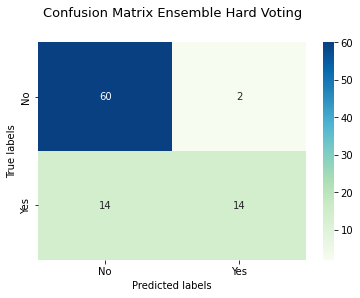

In [78]:
cm_hard = confusion_matrix(y_test,y_pred_test_hard1)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Ensemble Hard Voting\n', y=1.02, fontsize=13); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Dari hasil analisis nilai recall sebesar 0.97 (:0) dan 0.50 (:1) cukup besar selisih dengan nilai precision yaitu 0.81 (:0) dan 0.88 (:1), sehingga model masih kurang cukup baik dalam memprediksi. Untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 14 = false negatif (FN), false positif (FP) sebanyak 2, dan true positif (TP) sebanyak 60.

##### Balanced Data

In [79]:
print('Accuracy score data train balanced model Hard Voting  :',accuracy_score(y_train_smo, y_pred_train_hard2))
print('Accuracy score data test balanced model Hard Voting   :',accuracy_score(y_test_smo, y_pred_test_hard2))

Accuracy score data train balanced model Hard Voting  : 0.9361702127659575
Accuracy score data test balanced model Hard Voting   : 0.7741935483870968


In [80]:
print('\nHasil Classification Report Hard Voting Balanced\n')
print(classification_report(y_test_smo ,y_pred_test_hard2)) 


Hasil Classification Report Hard Voting Balanced

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        62
           1       0.90      0.61      0.73        62

    accuracy                           0.77       124
   macro avg       0.81      0.77      0.77       124
weighted avg       0.81      0.77      0.77       124



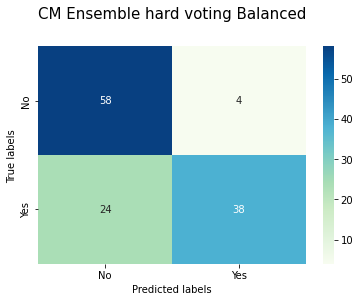

In [81]:
cm_hard = confusion_matrix(y_test_smo ,y_pred_test_hard2)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('CM Ensemble hard voting Balanced\n', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Dari hasil analisis nilai recall sebesar 0.94 (:0) dan 0.61 (:1) cukup besar selisih dengan nilai precision yaitu 0.71 (:0) dan 0.90 (:1), sehingga model masih kurang cukup baik dalam memprediksi. Untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 38, false negatif (FN) sebanyak 24, false positif (FP) sebanyak 4, dan true positif (TP) sebanyak 58.

### Ensemble Soft Voting

##### Imbalanced Data

In [82]:
print('Accuracy score data train model Soft Voting  :',accuracy_score(y_train, y_pred_train_soft1))
print('Accuracy score data test model Soft Voting   :',accuracy_score(y_test, y_pred_test_soft1))

Accuracy score data train model Soft Voting  : 0.9856459330143541
Accuracy score data test model Soft Voting   : 0.8333333333333334


In [83]:
print('\nHasil Classification Report Soft Voting imbalanced\n')
print(classification_report(y_test,y_pred_test_soft1)) 


Hasil Classification Report Soft Voting imbalanced

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        62
           1       0.81      0.61      0.69        28

    accuracy                           0.83        90
   macro avg       0.83      0.77      0.79        90
weighted avg       0.83      0.83      0.83        90



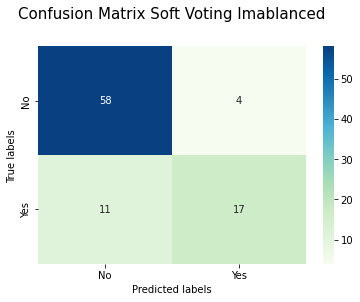

In [84]:
cm_hard = confusion_matrix(y_test ,y_pred_test_soft1)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Soft Voting Imablanced\n', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Dari hasil analisis nilai recall sebesar 0.94 (:0) dan 0.61 (:1) cukup besar selisih dengan nilai precision yaitu 0.84 (:0) dan 0.81 (:1), sehingga model masih kurang cukup baik dalam memprediksi. Untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 17, false negatif (FN) sebanyak 11, false positif (FP) sebanyak 4, dan true positif (TP) sebanyak 58.

##### Balanced Data

In [85]:
print('Accuracy score data train balanced model Soft Voting :',accuracy_score(y_train_smo, y_pred_train_soft2))
print('Accuracy score data test balanced model Soft Voting  :',accuracy_score(y_test_smo, y_pred_test_soft2))

Accuracy score data train balanced model Soft Voting : 0.9787234042553191
Accuracy score data test balanced model Soft Voting  : 0.8145161290322581


In [86]:
print('\nHasil Classification Report Soft Voting Balanced\n')
print(classification_report(y_test_smo ,y_pred_test_soft2)) 


Hasil Classification Report Soft Voting Balanced

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        62
           1       0.90      0.71      0.79        62

    accuracy                           0.81       124
   macro avg       0.83      0.81      0.81       124
weighted avg       0.83      0.81      0.81       124



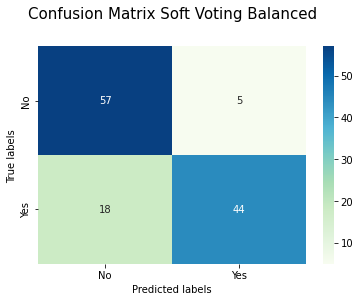

In [87]:
cm_hard = confusion_matrix(y_test_smo ,y_pred_test_soft2)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g',cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Soft Voting Balanced\n', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Dari hasil analisis nilai recall sebesar 0.92 (:0) dan 0.71 (:1) cukup besar selisih dengan nilai precision yaitu 0.76 (:0) dan 0.90 (:1), sehingga model masih kurang cukup baik dalam memprediksi. Untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 44, false negatif (FN) sebanyak 18, false positif (FP) sebanyak 5, dan true positif (TP) sebanyak 57.

### Ensemble Stacking

##### Imbalanced

In [88]:
print('Accuracy score data train balanced model Stacking  :',accuracy_score(y_train, y_pred_train_stacking1))
print('Accuracy score data test balanced model Stacking   :',accuracy_score(y_test, y_pred_test_stacking1))

Accuracy score data train balanced model Stacking  : 0.9521531100478469
Accuracy score data test balanced model Stacking   : 0.8555555555555555


In [89]:
print('\nHasil Classification Report Stacking imbalanced\n')
print(classification_report(y_test,y_pred_test_stacking1)) 


Hasil Classification Report Stacking imbalanced

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        62
           1       0.86      0.64      0.73        28

    accuracy                           0.86        90
   macro avg       0.86      0.80      0.82        90
weighted avg       0.86      0.86      0.85        90



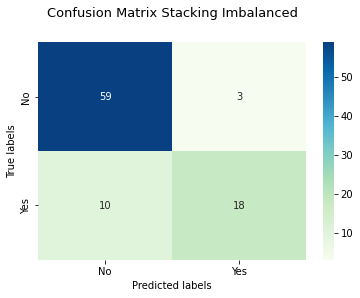

In [99]:
cm_hard = confusion_matrix(y_test ,y_pred_test_stacking1)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g',cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Stacking Imbalanced\n', y=1.02, fontsize=13); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.95 (:0) dan 0.64 (:1) cukup mendekati nilai precision yaitu 0.86 (:0) dan 0.86 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 18, false negatif (FN) sebanyak 10, false positif (FP) sebanyak 3, dan true positif (TP) sebanyak 59.

##### Balanced Data

In [91]:
print('Accuracy score data train balanced model Stacking :',accuracy_score(y_train_smo, y_pred_train_stacking2))
print('Accuracy score data test balanced model Stacking  :',accuracy_score(y_test_smo, y_pred_test_stacking2))

Accuracy score data train balanced model Stacking : 1.0
Accuracy score data test balanced model Stacking  : 0.8225806451612904


In [92]:
print('\nHasil Classification Report Stacking Balanced\n')
print(classification_report(y_test_smo ,y_pred_test_stacking2)) 


Hasil Classification Report Stacking Balanced

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        62
           1       0.90      0.73      0.80        62

    accuracy                           0.82       124
   macro avg       0.84      0.82      0.82       124
weighted avg       0.84      0.82      0.82       124



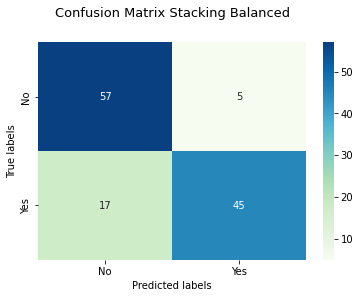

In [93]:
cm_hard = confusion_matrix(y_test_smo ,y_pred_test_stacking2)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g',cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Stacking Balanced\n', y=1.02, fontsize=13); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Dari classsification Report diketahui nilai recall sebesar 0.92 (:0) dan 0.73 (:1) sedikit jauh dengan nilai precision yaitu 0.77 (:0) dan 0.90 (:1), sehingga model masih kurang cukup baik dalam memprediksi. Untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 45, false negatif (FN) sebanyak 17, false positif (FP) sebanyak 5, dan true positif (TP) sebanyak 57.

### Ensemble Boosting

In [94]:
print('Accuracy score data train model Boosting  :',accuracy_score(y_test, ensemble_predictions)) 

Accuracy score data train model Boosting  : 0.8777777777777778


In [95]:
print('\nHasil Classification Report Ensemble Boosting\n')
print(classification_report(y_test, ensemble_predictions)) 


Hasil Classification Report Ensemble Boosting

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        62
           1       0.84      0.75      0.79        28

    accuracy                           0.88        90
   macro avg       0.87      0.84      0.85        90
weighted avg       0.88      0.88      0.88        90



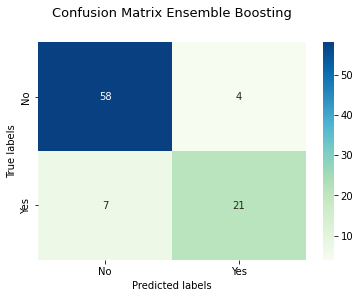

In [96]:
cm_hard = confusion_matrix(y_test, ensemble_predictions)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Ensemble Boosting\n', y=1.02, fontsize=13); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.94 (:0) dan 0.75 (:1) cukup mendekati nilai precision yaitu 0.89 (:0) dan 0.84 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 21, false negatif (FN) sebanyak 7, false positif (FP) sebanyak 4, dan true positif (TP) sebanyak 58.

# Kesimpulan

##### Imbalanced

In [97]:
from sklearn.metrics import f1_score
print("Accuracy score Hard Voting                : {:.2f}%".format(accuracy_score(y_test, y_pred_test_hard1) * 100))

print("Accuracy score Soft Voting                : {:.2f}%".format(accuracy_score(y_test, y_pred_test_soft1) * 100))

print("Accuracy score Stacking                   : {:.2f}%".format(accuracy_score(y_test, y_pred_test_stacking1) * 100))

print("Accuracy score data train model Boosting  : {:.2f}%".format(accuracy_score(y_test, ensemble_predictions) * 100)) 

Accuracy score Hard Voting                : 82.22%
Accuracy score Soft Voting                : 83.33%
Accuracy score Stacking                   : 85.56%
Accuracy score data train model Boosting  : 87.78%


Berdasarkan nilai accuracy yang dihitung untuk data imbalanced diatas dapat dilihat bahwa accuracy terbesar terletak pada ensemble model Boosting dengan accuracy sebesar 87.78%. Maka dapat dipastikan bahwa metode boosting paling baik digunakan dalam prediksi data yang digunakan. 

##### Balanced

In [98]:
print("Accuracy score Hard Voting   : {:.2f}%".format(f1_score(y_test_smo, y_pred_test_hard2) * 100))

print("Accuracy score Soft Voting   : {:.2f}%".format(f1_score(y_test_smo, y_pred_test_soft2) * 100))

print("Accuracy score Stacking      : {:.2f}%".format(f1_score(y_test_smo, y_pred_test_stacking2) * 100))

Accuracy score Hard Voting   : 73.08%
Accuracy score Soft Voting   : 79.28%
Accuracy score Stacking      : 80.36%


Sedangkan pada data balanced, performa dihitung menggunakan f1_score yang dihitung dengan menggabungkan perhitungan presisi (precision) dan recall untuk memberikan gambaran keseluruhan tentang performa model dalam memprediksi kelas positif. Dapat dilihat pada hasil diatas Stacking adalah metode yang memiliki f1 score terbesar dengan 80.36%.

Berdasarkan analisis yang telah dilakukan terdapat beberapa fitur yang tidak digunakan karena kurang digunakan dalam hal prediksi kematian untuk heart-failure. Kolom yang dihapus adalah CPK dan Platelets. Penghapusan kolom tidak hanya karena beralasan pemikiran medis, namun kedua kolom tersebut juga memiliki korelasi yang cukup rendah terhadap platelets. 

Dari hasil analisis feature selection age, anemia, diabetes, ejection_fraction, high_blood_pressure,creatinine, sodium, sex, smoking, time, death, kita gunakan dalam membangun model kita dapatkan bahwa berdasarkan data tersebut kita dapat memperkirakan resiko orang menderita gagal ginjal dengan akurasi prediksi sebesar 80-88%. Dengan metode yang paling baik dalam memprediksi adalah metode ensemble boosting.